In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import os
import re
import wordcloud
import matplotlib.pyplot as plt

In [2]:
stopwords_set = stopwords.words('english')
LEMMER = WordNetLemmatizer() 
STEMMER=PorterStemmer()

In [3]:
def my_lemmer(input_string):
    words = re.sub(r"[^A-Za-z\-]", " ", input_string).lower().split()
    words = [LEMMER.lemmatize(word) for word in words if word not in stopwords_set]
    return words

def my_stemmer(input_string):
    words = re.sub(r"[^A-Za-z\-]", " ", input_string).lower().split()
    words = [STEMMER.stem(word) for word in words if word not in stopwords_set]
    return words

In [42]:
def clean_columns(data):
    for col in data.columns:
        if(re.search(r'[^A-Za-z]+', col)):
            data=data.drop([col], axis=1)
        elif len(str(col))<=3:
            data=data.drop([col], axis=1)
    return data

def create_wordcloud(rawdata,vectorizer):
    tfidf_data = vectorizer.fit_transform(rawdata)
    tfidf_df = pd.DataFrame(tfidf_data.toarray(),columns=tfidf.get_feature_names_out())
    tfidf_df = clean_columns(tfidf_df)
    cloud = wordcloud.WordCloud(background_color="white", max_words=100).generate_from_frequencies(tfidf_df.T.sum(axis=1))
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()

In [43]:
tfidf = TfidfVectorizer(input = "content", max_features=100, tokenizer = my_stemmer, stop_words='english')

In [44]:
scraped_data = pd.read_csv("scraped_data.csv",index_col=0)

In [45]:
scraped_data.head()

,sentences
0,reach your customers on the messaging channel ...
1,now available with reve chat
2,learn more
3,make your customer communication smarter with ...
4,empower your service team with our enriched li...


C:\Users\vatss\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  % sorted(inconsistent)


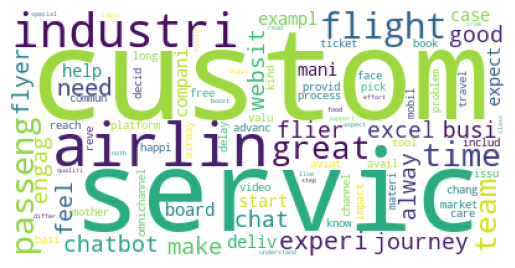

In [46]:
create_wordcloud(list(scraped_data.sentences),tfidf)

In [47]:
newsapi_data = pd.read_csv("newsapi_data.csv",index_col=0)

In [48]:
newsapi_data.head()

,news
0,American Airlines names flight from Kansas Cit...
1,American Airlines stole more than million rewa...
2,An American Airlines flight made a hard landin...
3,Ex American Airlines flight attendant arrested...
4,American Airlines Is Under Investigation After...


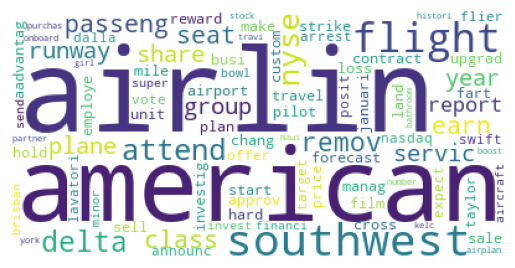

In [49]:
create_wordcloud(list(newsapi_data.news),tfidf)

In [53]:
labelled_data = pd.read_csv("cleaned_labelled.csv",index_col=0)

In [55]:
labelled_data.drop_duplicates(inplace=True)

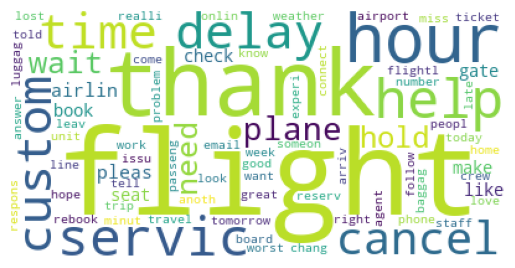

In [57]:
create_wordcloud(list(labelled_data.text),tfidf)